In [1]:
#import the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data: `Blobs` dataset

In [2]:
from sklearn.datasets import make_blobs

Generate a dataset with:
- 2000 samples with 10 features each;
- 8 classes of blobs (centers argument);
- cluster_std = 7

In [3]:
X, y = make_blobs(n_samples=2000, n_features=10, centers=8, cluster_std=7, random_state=0)

In [4]:
print(f'X.shape={X.shape}')
print(f'y.shape={y.shape}')

X.shape=(2000, 10)
y.shape=(2000,)


# Visualize the data

All the samples have 10 features. Lets plot one dimension against another

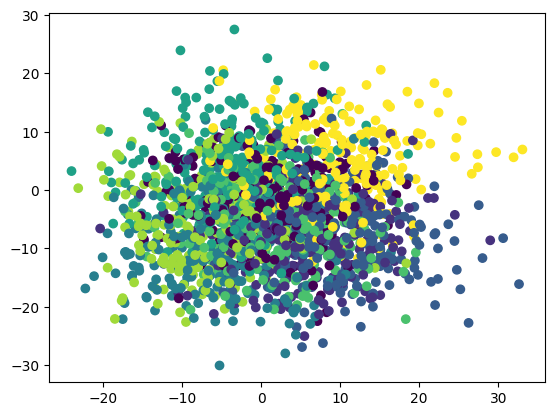

In [5]:
plt.scatter(X.T[0], X.T[4], c=y)

In [6]:
len(X.T[2])

2000

# Target encoding

In [7]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, dtype='uint8')
y_cat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

# Neural Network model

Create a function for a neural network model with the following architecture:
- 25 neurons in the input layer with the appropriate input dimension and activation = 'relu'
- hidden layer with 10 neurons and activation = 'relu'
- predictive layer suited for the problem

Compilation method with:
- categorical crossentropy loss
- adam optimizer
- accuracy metrics

In [8]:
from tensorflow.keras import Sequential, models
from tensorflow.keras import layers

In [9]:
def initialize_model():
    
    '''Architecture'''
    model = Sequential()
    model.add(layers.Dense(25, activation='relu', input_dim=10))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    
    '''Compilation'''
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')
    
    return model

# Cross-validation 

Create a loop using K-Fold from sklearn:
- choose 10 folds to fit the model on the train data
- evaluate the model on test data and store the results

In [10]:
%%time

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=10)
kf.get_n_splits(X)

results = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_cat[train_index], y_cat[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = initialize_model()
    
    model.fit(X_train_scaled, 
              y_train,
              epochs=150,
              batch_size=16,
              verbose=0
             )
    
    result = model.evaluate(X_test_scaled, y_test, verbose=0)
    results.append(result)

2023-09-08 20:53:13.898760: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 1min 15s, sys: 28.6 s, total: 1min 44s
Wall time: 1min 4s


In [11]:
results

[[0.7319510579109192, 0.7400000095367432],
 [0.6940343976020813, 0.7599999904632568],
 [0.6387829780578613, 0.7699999809265137],
 [0.7334556579589844, 0.7350000143051147],
 [0.7033410668373108, 0.75],
 [0.8503062725067139, 0.6949999928474426],
 [0.7467790246009827, 0.7850000262260437],
 [0.7756115198135376, 0.7350000143051147],
 [0.8853945136070251, 0.6899999976158142],
 [0.7218145728111267, 0.7599999904632568]]

In [12]:
accuracy = []

for i in results:
    accuracy.append(i[1])
    
mean_accuracy = np.mean(accuracy)
std_accuracy = np.std(accuracy)
print(f'accuracy = {mean_accuracy}')
print(f'std_accuracy = {std_accuracy}')

accuracy = 0.7420000016689301
std_accuracy = 0.02891366628825599


# Holdout Method

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [14]:
%%time

model = initialize_model()

history = model.fit(X_train, y_train,
          validation_split=0.2,
          batch_size=16,
          epochs=150,
          verbose=0,
          shuffle=True)

CPU times: user 6.7 s, sys: 1.63 s, total: 8.34 s
Wall time: 6.08 s


In [15]:
results = model.evaluate(X_test, y_test, verbose=0)

In [17]:
accuracy = results[1]
accuracy

0.6983333230018616

In [18]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Test'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

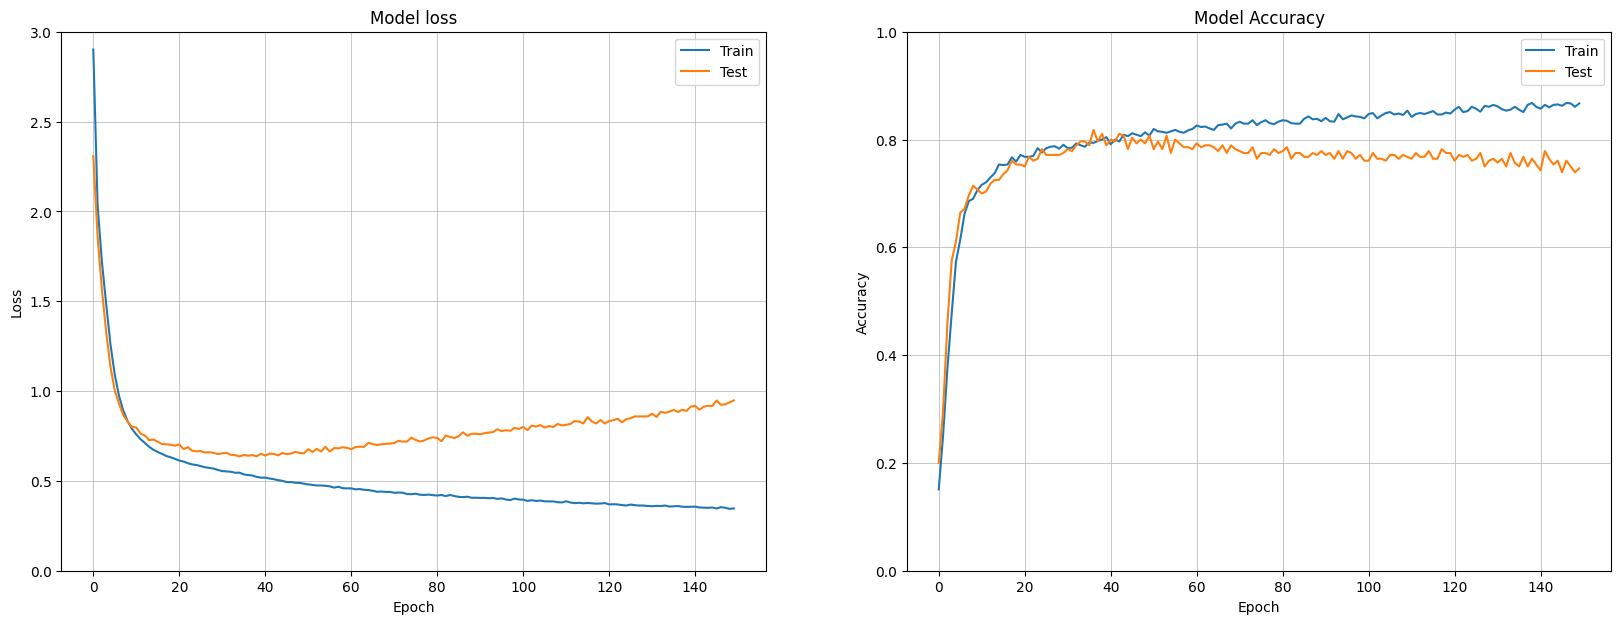

In [19]:
plot_loss_accuracy(history)